In [ ]:
import pandas as pd
import numpy as np

# Read CSV
df = pd.read_csv("students.csv")

# Show the original data
print("Original Data:")
print(df)

# Ensure 'Age' and 'Marks' are numeric (in case there are strings or missing values)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Marks'] = pd.to_numeric(df['Marks'], errors='coerce')

# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Marks'] = df['Marks'].fillna(df['Marks'].mean())  # Optional: only if there are missing marks

# Detect outliers using IQR for Marks
Q1 = df['Marks'].quantile(0.25)
Q3 = df['Marks'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Replace outliers with median of Marks
median_marks = df['Marks'].median()
df['Marks'] = np.where((df['Marks'] < lower) | (df['Marks'] > upper), median_marks, df['Marks'])

# Final cleaned data
print("\nCleaned Data:")
print(df)


Original Data:
   Rollno    Name   Age  Marks Class
0       1   Sudin  44.0   56.0    Fy
1       2  Shaima  46.0   76.0    Sy
2       3   Raina  27.0   48.0    Ty
3       4    Paul  38.0    NaN    Fy
4       5   Rahul  39.0   54.0    Sy
5       6   Gopal   NaN   32.0    Ty
6       7   Yatin  34.0   58.0    Fy
7       8     Jim  28.0   23.0    Sy
8       9    Nima  48.0   26.0    Ty

Cleaned Data:
   Rollno    Name   Age   Marks Class
0       1   Sudin  44.0  56.000    Fy
1       2  Shaima  46.0  76.000    Sy
2       3   Raina  27.0  48.000    Ty
3       4    Paul  38.0  46.625    Fy
4       5   Rahul  39.0  54.000    Sy
5       6   Gopal  38.0  32.000    Ty
6       7   Yatin  34.0  58.000    Fy
7       8     Jim  28.0  23.000    Sy
8       9    Nima  48.0  26.000    Ty


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Rename for ease
df.rename(columns={'petal length (cm)': 'petal_length', 'petal width (cm)': 'petal_width'}, inplace=True)


Intercept: -0.3630755213190291
Coefficient: 0.41575541635241153


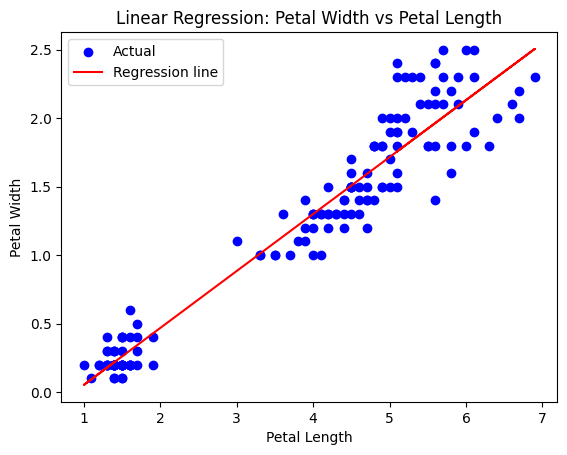

In [ ]:
# Define X and y
X = df[['petal_length']]
y = df['petal_width']

# Fit model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Predict and plot
predicted = model.predict(X)

plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, predicted, color='red', label='Regression line')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Linear Regression: Petal Width vs Petal Length")
plt.legend()
plt.show()
